In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import  Dense, Flatten, Dropout, Conv2D, MaxPooling2D, InputLayer, GlobalAveragePooling2D
from numpy.ma.core import shape
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.layers.core import flatten

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Numbers of class

In [3]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images[0].shape

(28, 28)

Text(0.5, 1.0, 'T-shirt/top')

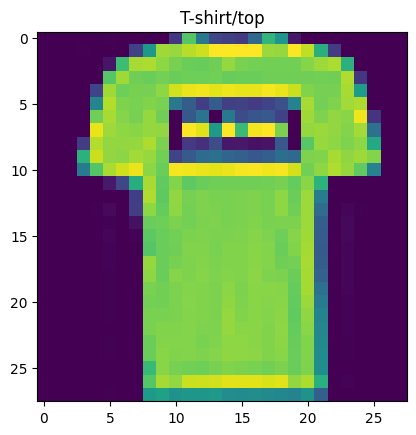

In [7]:
plt.imshow(train_images[1])
plt.title(class_names[train_labels[1]])

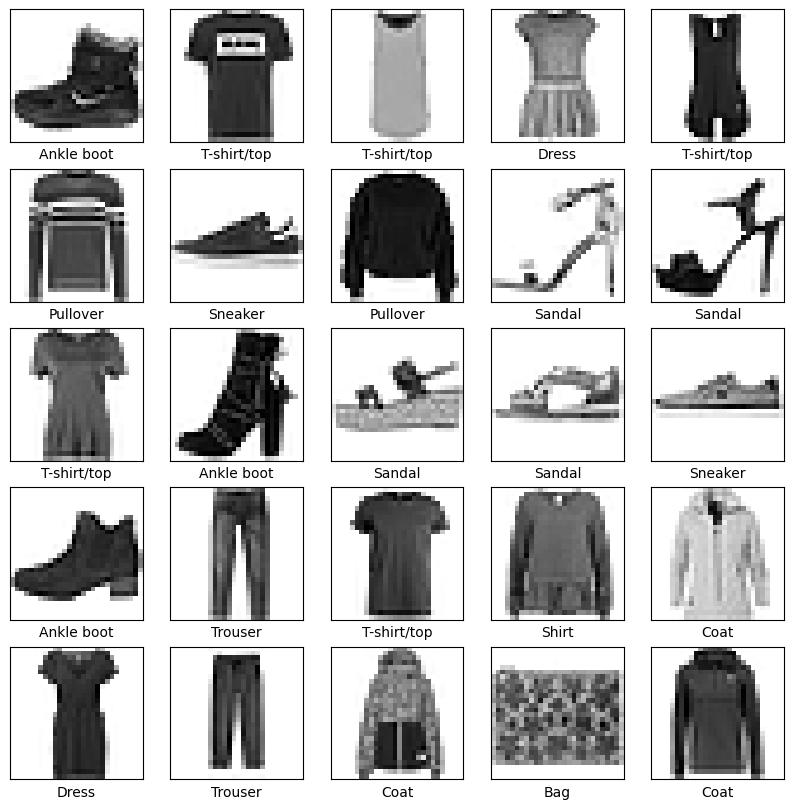

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [3]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
train_images /= 255
test_images /= 255

# Dense Nural Network with Dropout

In [4]:
model_nn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_nn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history = model_nn.fit(train_images, train_labels, epochs=100, batch_size=64, validation_batch_size=0.2)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6774 - loss: 0.9197 - val_accuracy: 0.8396 - val_loss: 0.4480
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8286 - loss: 0.4894 - val_accuracy: 0.8519 - val_loss: 0.4129
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8457 - loss: 0.4358 - val_accuracy: 0.8574 - val_loss: 0.3874
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8517 - loss: 0.4170 - val_accuracy: 0.8613 - val_loss: 0.3900
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8585 - loss: 0.3981 - val_accuracy: 0.8607 - val_loss: 0.3705
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8638 - loss: 0.3820 - val_accuracy: 0.8678 - val_loss: 0.3675
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8693 - loss: 0.3665 - val_accuracy: 0.8599 - val_loss: 0.3692
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8691 - loss: 0.3675 

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model_nn.evaluate(test_images,  test_labels, verbose=2)

print(f'\nTest accuracy: {round(test_acc*100)}%')

313/313 - 0s - 1ms/step - accuracy: 0.8861 - loss: 0.3838

Test accuracy: 89%


Test Accuracy: 0.8860999941825867 
Maximum Test Acuracy During Training:  0.8876000046730042


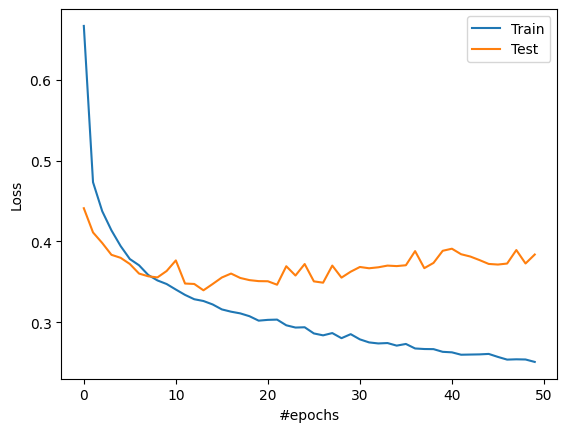

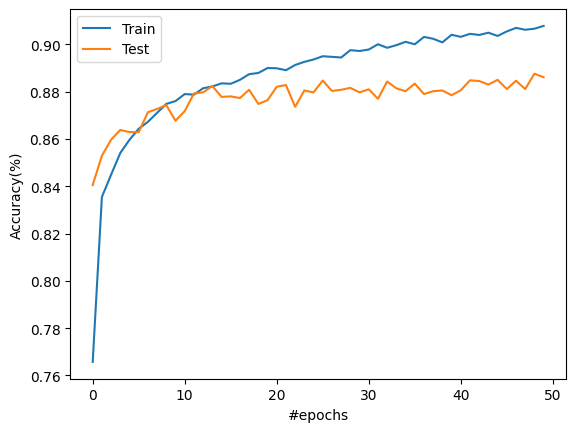

In [ ]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

# Convolutional Neural Network Modeling

In [7]:
model_cnn = Sequential([
    InputLayer(input_shape=(28, 28,1)),
    Conv2D(32, (2,2), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (2,2), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (2,2), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(200, activation='relu'),
    Dropout(0.5),
    Dense(10)
])

model_cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │        25,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,122 (270.01 KB)

 Trainable params: 69,122 (270.01 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history =  model_cnn.fit(train_images, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5099 - loss: 1.2999 - val_accuracy: 0.7760 - val_loss: 0.6019
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7689 - loss: 0.6364 - val_accuracy: 0.8107 - val_loss: 0.5081
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8072 - loss: 0.5388 - val_accuracy: 0.8328 - val_loss: 0.4554
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8244 - loss: 0.4837 - val_accuracy: 0.8466 - val_loss: 0.4191
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8335 - loss: 0.4533 - val_accuracy: 0.8528 - val_loss: 0.4006
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8453 - loss: 0.4223 - val_accuracy: 0.8645 - val_loss: 0.3685
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8547 - loss: 0.4068 - val_accuracy: 0.8688 - val_loss: 0.3555
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8572 - loss: 0.3891 - val_acc

In [10]:
test_loss, test_acc = model_cnn.evaluate(test_images,  test_labels, verbose=2)

print(f'\nTest accuracy: {round(test_acc*100)}%')

313/313 - 2s - 5ms/step - accuracy: 0.8954 - loss: 0.3817

Test accuracy: 90%


Test Accuracy: 0.9018333554267883 
Maximum Test Acuracy During Training:  0.9054166674613953


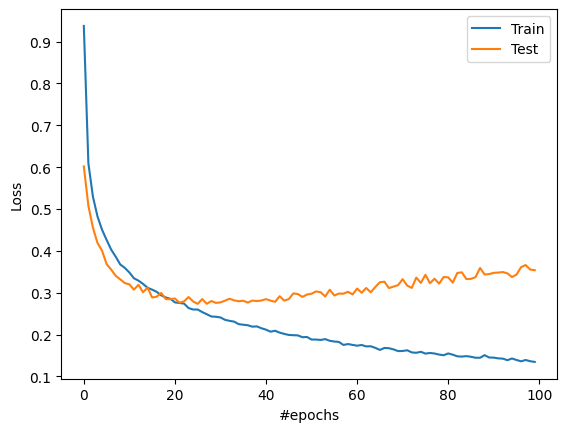

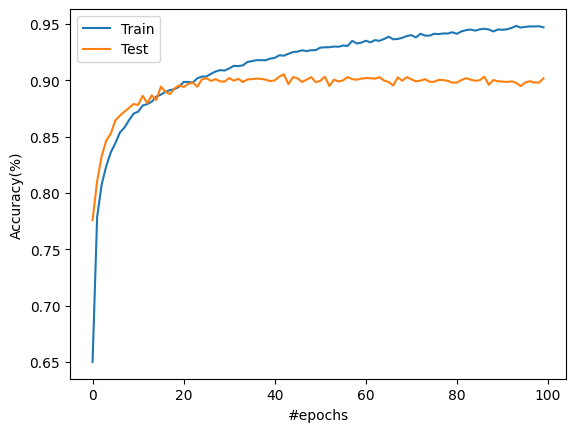

In [11]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()